<a href="https://colab.research.google.com/github/xh313/Corpus-Linguistics-Works/blob/main/CorpusLingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planning

## Inspiration:
![meme](https://user-images.githubusercontent.com/77285010/161146641-d099beed-56d7-40ef-8ae4-0083fe473d6f.png)

(source: https://www.reddit.com/r/Suomi/comments/tqx5ac/mielipide_suomesta_eri_alaredditeiss%C3%A4/)

When I was learning Finnish through browsing the Finnish language community on reddit r/suomi (meaning Finland in Finnish), I saw this meme which makes a contrast between the English language subreddit on Finland and the native language one. Obviously, the contrast between the sentiment on the place of the natives and the 'tourists' is pretty hilarious. I am thus intrigued to see what the differences are through analysing the corpora!


## Idea

- Scrap the English and native language subreddits of different places in the world and compare sentiments.
- Assume that the English corpora represent the discussions within 'international community', while the native corpora represent the 'local community'.
- Compare and contrast:
  - English vs Native sentiments
  - How the contrast is different for different countries / places around the world.
- (?) More detailed analysis on several particular data sets?

## Methods
- Scrap the subreddits
- Translation: first compare if the sentiment of the translated corpora is similar enough to the original corpora by sampling a few languages
- If translation does not strip the sentiment too much, the translated corpora would be used to do comparative analysis.



---


## [NOT UPDATING] Channel lists:

No longer updating since this is too laborious.

E = English, N = Native

- Poland:
  - E: https://www.reddit.com/r/poland/
  - N: https://www.reddit.com/r/Polska/

- Finland:
  - E: https://www.reddit.com/r/Finland/
  - N: https://www.reddit.com/r/Suomi/

- Brazil:
  - E: https://www.reddit.com/r/Brazil/
  - N: https://www.reddit.com/r/brasil/

- Turkey:
  - E: https://www.reddit.com/r/Turkey/
  - N: https://www.reddit.com/r/Turkiye/

## Channel Lists (New):

In [ ]:
# Tester list to run faster
test_srs = ['Finland', 'Suomi', 
       'Brazil', 'brasil'
       ]

# Tester list for translation analysis
trans_srs = [#'poland', 'Polska',   # The Poland sr does not work properly
       'Finland', 'Suomi', 
       'Brazil', 'brasil',
       #'Turkey', 'Turkiye',
       'China', 'China_irl',  # Uncertain if this counts
       #'japan', 'ja',
       #'Thailand', 'thaithai',
       #'spain', 'es',  # The 'spain' one is flooded w spanish as well...
       #'southafrica', 'RSA',
       ]

# Current working list
# English, Native format!!
srs = ['poland', 'Polska',   # The Poland sr does not work properly
       'Finland', 'Suomi',  # Scraped already
       'Brazil', 'brasil',
       'Turkey', 'Turkiye',
       'China', 'China_irl',  # Uncertain if this counts
       'japan', 'ja',
       'Thailand', 'thaithai',
       'spain', 'es',  # The 'spain' one is flooded w spanish as well...
       'southafrica', 'RSA',
       'Norway', 'norge',
       ]

Always run the list cell after adding new subreddits to make sure that the list is up-to-date

# Issues / Limitations

## To-be-resolved list

1. [Maybe manually build model & train data?] Some native language forums have bits and pieces of English mixed in, or just reddit codes and stuff in English.
2. How many hot posts should I extract per forum?
3. Naïve Bayes only telling the positive / negative or do topic modelling instead?
4. [RESOLVED: lemmatization] Not-so-accurate results for highly-infleceted langs?
5. Lacks a good package to remove stopwords from Finnish texts.

## Unresolved limitations

1. Size of subreddits vary a lot
2. Naturally the topic focus would be subtly different in different subreddits, which ones are comparable?

# Future directions

- Do a heat map on how each country describes other countries (translate the corpora, do antconc)
- More sociopolitical analysis on the data
- Time series analysis: is the data today different from a month ago

# Codes

## Installations / Mounting / Importing

### Installations

In [1]:
!pip install praw
!pip install googletrans==3.1.0a0
#!pip install google_trans_new

     |████████████████████████████████| 176 kB 9.3 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 42 kB 598 kB/s 
     |████████████████████████████████| 1.3 MB 11.7 MB/s 
     |████████████████████████████████| 65 kB 2.3 MB/s 
     |████████████████████████████████| 53 kB 942 kB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=6a348805926660aafca51a785f68e1e6ccf0333448e98404e042fbb62670d962
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


### Importing

In [2]:
import praw

reddit = praw.Reddit(client_id="R7keGb8iIXeFuLo-CZOs7g",
                     client_secret="ieKEfzD3VvRdmg-HGR0yUt3A6jD_Lw",
                     user_agent="scrapata",
                     username='hxhthewebscraper',
                     password='Puhun_suomea4')

print(reddit.user.me())

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



hxhthewebscraper


In [3]:
import regex as re
import numpy as np
import pandas as pd
from googletrans import Translator
#from google_trans_new import google_translator 
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Scraping

In [ ]:
def subr_to_list(subreddit, number):
  """
  Takes a subreddit name and scraps posts into a list.
  Returns the list.
  """
  subr_list = list() #key is body, value is judgement

  # get 10 hot posts from the r/Suomi subreddit
  hot_posts = reddit.subreddit(subreddit).hot(limit=number) #this is pulling out the hot posts
  for post in hot_posts:  
      submission = reddit.submission(id=post.id)
      subr_list.append(submission.selftext)
      #linked_post = reddit.submission(url='https://www.reddit/com/'+post.url)
      #for top_level_comment in submission.comments:
        #print(top_level_comment.body)
        #subr_dict[submission.selftext] = top_level_comment.body

  return subr_list

In [ ]:
def list_to_txt(postlist, filename, ordinal='1'):
  """
  Takes a list of processed subreddit posts and output a .txt file.
  The ordinal in the end is added to sort the files properly.
  """
  outfile = open('/content/drive/My Drive/LGCS124/FinalProject/TestCorpora/' + str(int(ordinal)) + '_' + filename + '.txt', 'w')

  for post in postlist:
    outfile.write(post)
    outfile.write('\n')

  outfile.close()

In [ ]:
# Tester: [DON'T RERUN THIS IT TAKES AGES!!!]

#finland_e = subr_to_list('Suomi', 100)

In [ ]:
#list_to_txt(finland_e, 'finland_e')

### The ultimate scraper!

In [ ]:
def subr_extract(subreddit, number, ordinal='1'):
  """
  The ultimate extraction. Takes a string that is the name of the subreddit
  and the number of posts to be scraped.
  The ordinal in the end is added to sort the files properly.
  """
  postlist = subr_to_list(subreddit, number)
  list_to_txt(postlist, subreddit, ordinal)

In [ ]:
# Tester
subr_extract('Polska', 10)

In [ ]:
# Tester
ord = 1
for sr in test_srs:
  subr_extract(sr, 10, ord)
  ord += 0.5

### Function written to scrape the list [srs](https://colab.research.google.com/drive/1Fh5wP9f8Qt47cjE8xgT86ub9eWUZo-iR#scrollTo=ImvYf0MSCW4B&line=3&uniqifier=1)

In [ ]:
def scrap_srs(currentsrs, number):
  ord = 1
  for sr in currentsrs:
    subr_extract(sr, number, ord)
    ord += 0.5

### Call this to get all files from current srs into the drive


In [ ]:
# DON'T RUN UNLESS YOU WANT TO GET THE FILE NOW!
#scrap_srs(srs, 50)

## Translation testing
This is to check if the sentiment would be lost after translation of the non-English corpora into English. Two translators would be used:
- DeepL
- Google Translate

To test translation, three pairs of corpora are used:
1. Finland (Finnish, English)
2. Brazil (Brazilian Portuguese, English)
3. China (Simplified Chinese, English)

Of which Finnish has the highest morphological complexity being an agglutinative language, Brazilian Portuguese the medium and Chinese the lowest. 

In [ ]:
# Run this code cell to get translation tester corpora
scrap_srs(trans_srs, 30)

For the Finnish sentiment analysis, the testing corpus used is from the Korp API: https://korp.csc.fi/. I referenced https://github.com/tjkemp/ubik-sentiment for the code used to strip data from the corpus. It is combined with another labeled corpus from Turku University.

### Corpus input

#### Turku corpus

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LGCS124/FinalProject/TranslationTrainingData/FinnSentiment2020.tsv', sep='\t', header=0)

df.head()

,a,b,c,major,derive,smiley,produ,split,batch,index in original,text
0,1,0,1,1,4,0,-1,1,1,comments2008c.vrt 2145269,- Tervetuloa skotlantiin...
1,0,1,0,0,4,0,-1,12,1,comments2011c.vrt 3247745,"...... No, oikein sopiva sattumaha se vaan oli..."
2,0,0,0,0,3,0,-1,14,1,comments2007c.vrt 3792960,40.
3,1,1,1,1,5,0,1,7,1,comments2010d.vrt 2351708,Kyseessä voi olla loppuelämäsi nainen.
4,1,1,1,1,5,0,1,12,1,comments2007d.vrt 1701675,Sinne vaan ocean clubiin iskemään!


In [ ]:
pos_df = df[df['derive'] > 3]
pos_list = list(pos_df['text'])

neg_df = df[df['derive'] < 3]
neg_list = list(neg_df['text'])

neu_df = df[df['derive'] == 3]
neu_list = list(neu_df['text'])

In [ ]:
pos_list[:10]

['- Tervetuloa skotlantiin...',
 '...... No, oikein sopiva sattumaha se vaan oli, vai mitä?',
 'Kyseessä voi olla loppuelämäsi nainen.',
 'Sinne vaan ocean clubiin iskemään!',
 'Itsekin pidän Keskustan kampanjointia ihan hyvänä.',
 'Muutenkin suosittelen kaikille asiasta kiinnostuneille tuota Mark "Gravy" Robertsin mainiota paperia.',
 'Ja kun vielä nuukan puoleinenkin on, mikäs sen lepposampaa elää hänen vierellään',
 'Tottakai myös ylpeä "tulevasta" vaimostani.',
 'Suuret kiitokset tämän mahtavan tapahtuman järjestäjille!',
 'Kuka "korkkaisi" minut?']

In [ ]:
neg_list[:10]

['huomista päivää odotellen..',
 'en haluaisi että kissani vuotaa.. =)',
 'Nyt olisi lääkitys paikallaan.',
 'Eniten pelkään sitä, että jos mies vain koko ajan siirtää perheenperustamista vuosilla eteenpäin, kunnes emme enää saakkaan lapsia..tiedä häntä.',
 'Teillähän asenne on kohdallaan!',
 'Tuntuu kuin olisin pelkkä huora.',
 'en kertonut, koska oisit vaan suuttunut.',
 'Missä kohtaa olen sinua nimitellyt?',
 'Onko joku tehnyt tälläisen tempun?',
 'Sateenkaariväki kuvittelee, että kaksi "isää" ei voi korvata äitiä, eikä kaksi "äitiä" voi korvata isää.']

In [ ]:
neu_list[:10]

['40.',
 'Kamppi, Kontula, Kluuvi',
 'Ihmiset joutuvat joskus monenlaisien päätelmien kohteeksi.',
 'Koska naiset yleensä arvostavat miehessä eniten itsevarmuutta ja ujo mies saattaa helposti antaa itsestään epävarman vaikutelman vaikka ei sitä olisikaan.\n-1\t-1\t-1\t-1\t1\t0\t1\t1\t1\tcomments2016e.vrt 3255363\tTyöstä kuuluu maksaa palkkaa vai meinaatko että palkkatyöläiset menisivät 9eurolla hommiin ja maksaisivat sillä laskunsa.Ei hyvää päivää mihin maamme on vajonnut ja hallitus ajaa tälläistä politiikkaa.\n-1\t-1\t0\t-1\t2\t1\t0\t3\t1\tcomments2010c.vrt 2040506\tVastahan sinä myönsit, ettei tuolla ominaisuuden hyödyllisyydellä - eikä siten vahingollisuudella - ole mitään tekemistä asian kanssa!',
 'Jos taas mielestäsi maailmassa on jokin pielessä ja haluat muutosta, osoita tukesi niin liity mukaan muuttamaan maailmaa.',
 'Miten on Turun-lentojen laits?',
 'Tämähän ei maksa kaupungille mitään, mutta operaatio säilyttäisi kasarmin.',
 'on vapaaehtoista käyttääkö uikkareita vai ei',

In [ ]:
# Export to file for local lemmatization

def list_to_corp_file(listname, filename):
  """
  Takes a list called listname and output a txt file with each item on one line.
  The txt file is named filename (string).
  """
  outfile = open('/content/drive/MyDrive/LGCS124/FinalProject/TranslationTrainingData/' + filename + '.txt', 'w')
  for l in listname:
    outfile.write(l)
    outfile.write('\n')
  outfile.close()

In [ ]:
list_to_corp_file(pos_list, 'pos_list')
list_to_corp_file(neg_list, 'neg_list')
list_to_corp_file(neu_list, 'neu_list')

#### Korpi corpus (Not in use)

A corpus analysing sentiment based on the smilely tags. Stopped using since its accuracy of tagging is questionable (rather than manually tagging the message, it simply search for smiley faces...).

In [ ]:
pos_korpi = []
neg_korpi = []

In [ ]:
infile = open('/content/drive/MyDrive/LGCS124/FinalProject/korp_all_sentences.txt', 'r')
all = infile.read()

infile.close()

In [ ]:
cleaned = re.sub(r'\nb', r'\n', all)  # remove all the b leading each line
cleaned = re.sub('\n\'\:\)\'', '', cleaned)  # remove the lines with only :)
cleaned = re.sub('\n\'\:\(\'', '', cleaned)  # remove the lines with only :(
cleaned = re.sub('\'\n\'', '\n', cleaned)  # remove the quotation marks 
cleaned = cleaned.replace('\\xc3\\xa4', 'ä')
cleaned = cleaned.replace('\\xc3\\xb6', 'ö')
splitted = cleaned.split('\n')

for line in splitted:
  if ':)' in line:
    pos_korpi.append(line[:-3])  # Exclude the :)
  else:
    neg_korpi.append(line[:-3])

In [ ]:
pos_korpi[:20]

['kitystä ei sukupuolella tai iällä ) - Olisin Charlien ja Fredin ja Georgen sekoitus',
 'Ja jos jäikin niin mielikuvitus on hoitanut homman',
 '- Hagrid',
 'Ensin ajattelin , että se on varmaan ihan huono , mutta olikin sitten hyvä',
 'tai Lily Luna Potter',
 ') Rowling kirjoittaa hyvin ja tarina on uskomaton',
 'ja ron joutuu viettää loppu ikänsä terapeutin vastaan otolla ..',
 'jotenki noin se meni',
 'njaah Jos Harry kuolee nii se pääse äitinsä , isänsä , Siriuksen ja Dumbledoren luo',
 'Jotain olin lainannut kansainvälisten foorumeiden spekulaatioista , mutta ainakin tuo Nevillen vanhempia koskeva osuus oli ihan omani',
 'Rowling onnistuu yllättämään aina !',
 'Harry ja Voldemortt Nii voihan se tietenkin olla niinkin',
 'Enkä usko , että Ginnyäkään hylätään aivan vielä ...',
 'Mutta uskon että Nevillellä tulee olemaan suuri rooli viimeisessä kirjassa , kuin myös Lunalla joka loisti poissaolollaan kirjassa 6. Loppuratkaisua en halua edes pohtia , jätän sen Jolle',
 '10. Dobby on ko

### Stemming (Not in use)

The stemmer is not in use since it does not increase model accuracy and fails to stem same words with different inflections correctly.

In [ ]:
#Import nltk Snowball stemmer
from nltk.stem.snowball import SnowballStemmer

#Create a Finnish instance
fistemmer = SnowballStemmer("finnish")

#Print the stemmed version of some Finnish word
print(fistemmer.stem('toimittaa'))

toimit


### Self-built Naïve Bayes Training w/ Lemmatization (Not in use, moved to local machine instead)

Since the library and dictionary used for lemmatization is too huge, this part is run locally. See my code [here](https://github.com/xh313/Corpus-Linguistics-Works/tree/main/CorpusLingLocalScripts). The lemmatizing database is from `libvoikko`. For info about this library see [here](https://voikko.puimula.org/).


In [ ]:
# Import back the list of lemma

pos_lemma_df = pd.read_csv('/content/drive/MyDrive/LGCS124/FinalProject/TranslationTrainingData/pos_lemma.csv')
neg_lemma_df = pd.read_csv('/content/drive/MyDrive/LGCS124/FinalProject/TranslationTrainingData/neg_lemma.csv')

pos_lemma = list(pos_lemma_df['lemma'])
neg_lemma = list(neg_lemma_df['lemma'])

In [ ]:
# Naïve bayes training functions

def get_word_counts(word_list):
    """
    Takes as input a lemma list and returns a dictionary with the
    number of times each word occurred in that file.
    :param list: The file to be counted
    :return: A dictionary containing the number of occurrences for each word
    """

    dictionary = {}
    #word_list = []

    #for l in listname:
        #word_list += l.split()

    for word in word_list:
      word_stemmed = word  # No stemming
      #word_stemmed = fistemmer.stem(word)  # stemming
      if word_stemmed not in dictionary:
          dictionary[word_stemmed] = 1
      else:
          dictionary[word_stemmed] += 1

    return dictionary

def counts_to_probs(dictionary, num):
    """
    Takes a dictionary and a number and generates a new dictionary with
    the same keys where each value has been divided by the input number.
    :param dictionary: The dictionary to be operated on
    :param num: The number to be divided
    :return: A dictionary in which all values for each key have been divided by num
    """
    for word in dictionary:
        dictionary[word] /= num

    return dictionary

def train_model(listname, word_list):
    """
    Takes as input a listname containing examples and returns a dictionary with the word probabilities.
    :param listname: The name of the list to be counted and calculated
    :return: A dictionary containing the probability of the occurrences of each word type
    """
    lines = len(listname)
    counts = get_word_counts(word_list)
    probs = counts_to_probs(counts, lines)
    return probs

def get_probability(dictionary, string):
    """
    Takes as input two parameters, a dictionary of word probabilities and a
    string (representing a review), and returns the probability of that review
    by multiplying the probabilities of each of the words in the review.
    :param dictionary: The dictionary containing the probability data
    :param string: The string to be evaluated on
    :return: The product of teh probability of each of the words in the string
    """
    string = string.lower()
    word_list = string.split()  # Create a list of words from the input str
    probs = 1  # Initialise

    for word in word_list:
        if word in dictionary:
            probs *= dictionary[word]
        else:
            probs *= 1 / 11000

    return probs


def classify(string, pos_dict, neg_dict):
    """
    Takes a string (a review), a positive and a negative model. Returns “positive” or
    “negative” depending on which model has the highest probability for the review.
    Ties goes to positive.
    :param string: The review to be classified
    :param pos_dict: The positive model (dict)
    :param neg_dict: The negative model (dict)
    :return: “positive” or “negative” depending on which model has the highest probability for the review.
    """
    pos_probs = get_probability(pos_dict, string)
    neg_probs = get_probability(neg_dict, string)
    if (pos_probs - neg_probs) >= 0:
        return 'positive'
    else:
        return 'negative'

def sentiment_analyzer_interactive(pos_list, neg_list):
    """
    An interactive function that takes two files as input, a positive
    examples file and a negative examples file. It would train a positive
    and negative model using these files and then repeatedly ask the user
    to enter a sentence and then output the classification of that sentence
    (as positive or negative). A blank line/sentence should terminate the function.
    :param pos_file: File name of the positive training data
    :param neg_file: File name of the negative training data
    """
    pos_dict = train_model(pos_list, pos_lemma)
    neg_dict = train_model(neg_list, neg_lemma)  # Train the models

    print('Blank line terminates.')
    string = input('Enter a sentence: ')
    while string != '':
        print(classify(string, pos_dict, neg_dict))
        string = input('Enter a sentence: ')



def get_accuracy(pos_train, neg_train, pos_test, neg_test):
    """
    A function that would train the model (i.e., both positive and negative counts) and then classify
    all of the test examples (both positive and negative) and keep track of the accuracy of the
    model. It would print out three scores: the accuracy on the positive test examples,
    the accuracy on the negative test examples, and the accuracy on all of the test examples.
    :param pos_test_name: File name of the positive testing data
    :param neg_test_name: File name of the negative testing data
    :param pos_train: File name of the positive training data
    :param neg_train: File name of the negative training data
    """
    pos_dict = train_model(pos_train, pos_lemma)
    neg_dict = train_model(neg_train, neg_lemma)  # Train the models

    pos_total = len(pos_test)
    neg_total = len(neg_test)  # Total num of pos & neg reviews

    pos_actual = 0
    neg_actual = 0  # Initialise

    for l in pos_test:
        if classify(l, pos_dict, neg_dict) == 'positive':
            pos_actual += 1

    for l in neg_test:
        if classify(l, pos_dict, neg_dict) == 'negative':
            neg_actual += 1

    pos_accuracy = pos_actual / pos_total
    neg_accuracy = neg_actual / neg_total
    total_accuracy = (pos_actual + neg_actual) / (pos_total + neg_total)

    print('Positive accuracy: ', pos_accuracy)
    print('Negative accuracy: ', neg_accuracy)
    print('Total accuracy: ', total_accuracy)

In [ ]:
get_accuracy(pos_list, neg_list, pos_korpi, neg_korpi)

Positive accuracy:  0.3932444645277903
Negative accuracy:  0.7922077922077922
Total accuracy:  0.43095335515548283


In [ ]:
sentiment_analyzer_interactive(pos_list, neg_list)

Blank line terminates.
Enter a sentence: Jos taas mielestäsi maailmassa on jokin pielessä ja haluat muutosta, osoita tukesi niin liity mukaan muuttamaan maailmaa.
positive
Enter a sentence: 


### Model choice and comparisons

In addition to my self-built model, several other built classifier models are used, including the NLTK Naïve Bayes, Scikit-learn Naïve Bayes (Bernoulli), and Scikit-learn Support Vector Machine.

For the comprehensive comparison result, see [here](https://github.com/xh313/Corpus-Linguistics-Works/blob/main/CorpusLingLocalScripts/fi_model_testing.txt).



### Translating & English sentiment

Google translation and google translator API is used for translation. 

TextBlob is used for English sentiment analysis in order to compare with the source language results.

The TextBlob.sentiment method also uses the NLTK Naïve Bayes classifier, which is the same algorithm as the one I built for Finnish.

In [ ]:
# Emoji stripper
def strip_emoji(text):
  all_emoji = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  return all_emoji.sub(r'', text)

In [ ]:
from textblob.blob import Sentence
def analyze_in_eng(subreddit, ordinal=1):
  """
  Translate the file named the same as the subreddit, then analyse the
  sentiment of the text.
  Returns the positive/negative data dict.
  Look for the filename and its ordinal in the drive!
  """
  translator = Translator()  # To use the google api

  infile = open('/content/drive/My Drive/LGCS124/FinalProject/TestCorpora/' 
                + str(int(ordinal)) + '_' + subreddit + '.txt')
  pos_count = 0
  neg_count = 0
  pos_posts = []
  neg_posts = []
  neu_posts = []
  polarity_all_posts = []

  for line in infile:
    line_clean = strip_emoji(line)  # Remove emoji
    line_clean = re.sub(r'http\S+', '', line_clean)  # Remove links
    line_clean = re.sub(r'\s{2,}', ' ', line_clean)  # Remove extra spaces
    line_clean = re.sub(r'\*', '', line_clean)  # Remove asterisks
    
    lineblob = TextBlob(line_clean)  # Create a textblob
    polarity_all_sentences = []  # Initialise
    for sentence in lineblob.sentences:
      lang = translator.detect(str(sentence)).lang
      if lang != 'en':
        sentence = sentence.translate(to='en')  # Into English!
      print(f'Sentence: {sentence}')
      polarity = sentence.sentiment.polarity
      print(f'Polarity: {polarity}')
      polarity_all_sentences.append(polarity)
      polarity_all_posts.append(polarity)
    
    average_polarity = np.average(polarity_all_sentences)
    if average_polarity < 0:
      neg_count += 1
      neg_posts.append(line)
    if average_polarity > 0:
      pos_count += 1
      pos_posts.append(line)
    else:
      neu_posts.append(line)

  # Calculate the proportion of positive posts
  proportion = pos_count / (pos_count + neg_count)
  avg_polarity = np.average(polarity_all_posts)

  # Sort a dict of data
  data = {'pos': pos_count, 'neg': neg_count,
          'prop': proportion, 'pol': avg_polarity,
          'pos_posts': pos_posts, 'neg_posts': neg_posts,
          'neu_posts': neu_posts}
  
  # Print the data of the file analysed
  print(f'{subreddit}, translated version')
  print('Positives: ' + str(pos_count))
  print('Negatives: ' + str(neg_count))
  print('Portion Positive: ' + str(proportion))
  print(f'Average Polarity: {avg_polarity}')


  return data

In [ ]:
# Tester TAKES EXTRA LONG CAUTION
analyze_in_eng('Suomi', 1)

print('End marker')

# Data

## Current collection method / progress
The data I currently need to collect are how effective the different sentiment classifying models are, and what the sentiments of my scraped texts are based on the prediction of the models.

To test the model, I wrote a function to get the accuracy by letting my model classify some labelled texts, and then compare the classification as predicted by the model with the actual label originally attached. I controlled the models to test on the same corpus with 2000 positive and 2000 negative sentences, of which randomly 90% is used in training the model and 10% is used in testing. I run each model on the shuffled data 3 times and take the average. The model I decided to use further has an accuracy of 69% for Finnish texts and 75% for English tests when trained on 4000 lines of data, and I would later test if increasing the data size would help increase the accuracy.

For more detailed model accuracy [testing results](https://github.com/xh313/Corpus-Linguistics-Works/blob/main/CorpusLingLocalScripts/fi_model_testing.txt) and the [source codes of the model](https://github.com/xh313/Corpus-Linguistics-Works/blob/main/CorpusLingLocalScripts/translated_nltk.py), see the links.

To get the sentiment, I simply make my models predict the sentiments of each sentence and post of my text and give me the statistics. I then collect the percentage of posts collected as positive and negative. I also repeat the classification 3 times and take the average. For the translated part, I first translate every sentence, and then run the model trained on English training data to analyze the translated text.

For more sentiment raw data see [here](https://github.com/xh313/Corpus-Linguistics-Works/blob/main/CorpusLingLocalScripts/fi_model_result.txt).

I have already obtained a sample datum for r/Suomi vs r/Finland. The former one (native forum), when analyzed in Finnish directly, gives out the result that the proportion of posts with positive sentiment is 71.5%; when translated into English and analysed, the proportion is 68.8%, which has a slight discrepancy. The latter one, where discussions are originally held in English, yielded a proportion of 81.8% positive, which is significantly higher than r/Suomi.

## Model selection dataframe and visualisation

This is the dataframe and visualisation constructed for the model selection part.

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/xh313/Corpus-Linguistics-Works/main/model_testing_df.csv')

test_df

,model,language,strategy,avg_accuracy
0,NLTK NB,Finnish,Qualitative,0.690
1,NLTK NB,Finnish,Qualitative,0.703
2,NLTK NB,Finnish,Qualitative,0.680
3,NLTK NB,Finnish,Quantitative,0.628
4,SKL NB,Finnish,Qualitative,0.678
5,SKL NB,Finnish,Quantitative,0.680
6,NLTK SVM,Finnish,Qualitative,0.675
7,NLTK SVM,Finnish,Quantitative,0.688
8,Self-built NB,Finnish,Qualitative,0.730
9,Self-built NB,Finnish,Qualitative,0.713


To visualise a bit:

In [ ]:
# Select Finnish data first
test_df_fi = test_df[(test_df.language == 'Finnish')]
test_df_fi

,model,language,strategy,avg_accuracy
0,NLTK NB,Finnish,Qualitative,0.690
1,NLTK NB,Finnish,Qualitative,0.703
2,NLTK NB,Finnish,Qualitative,0.680
3,NLTK NB,Finnish,Quantitative,0.628
4,SKL NB,Finnish,Qualitative,0.678
5,SKL NB,Finnish,Quantitative,0.680
6,NLTK SVM,Finnish,Qualitative,0.675
7,NLTK SVM,Finnish,Quantitative,0.688
8,Self-built NB,Finnish,Qualitative,0.730
9,Self-built NB,Finnish,Qualitative,0.713


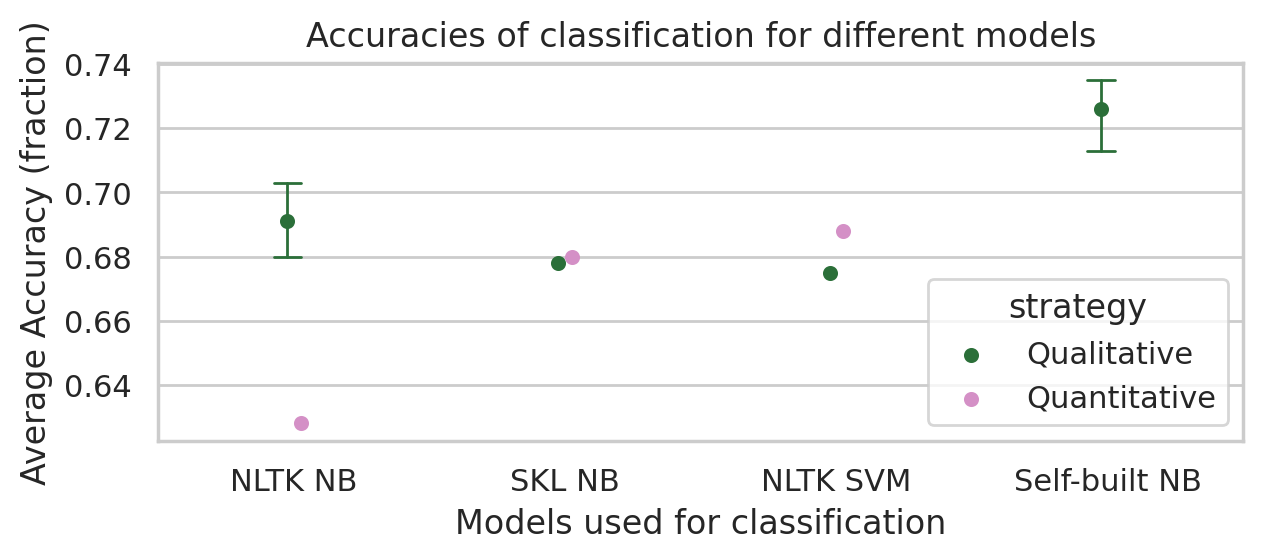

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(dpi=200, figsize=(7, 2.5))
test_ax = sns.pointplot(
    data=test_df_fi,
    x="model", y="avg_accuracy", hue="strategy", #style="language",
    join=False, palette='cubehelix',
    capsize=.1, dodge=True, errwidth=1,
    markers='.',
)
plt.xlabel('Models used for classification')
plt.ylabel('Average Accuracy (fraction)')
plt.title('Accuracies of classification for different models')

plt.savefig('model_accuracy.svg')
plt.show()

## Results data visualisation

In [5]:
res_df = pd.read_csv('https://raw.githubusercontent.com/xh313/Corpus-Linguistics-Works/main/model_results_df.csv')
res_df

,model,subreddit,collection_date (M/D/Y),language,country,translated,portion_positive,native
0,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
1,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
2,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.739,True
3,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.681,True
4,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.688,True
...,...,...,...,...,...,...,...,...
69,NLTK NB,r/ja,4/27/22,Japanese,Japan,True,0.779,True
70,NLTK NB,r/thaithai,4/27/22,Thai,Thailand,True,0.869,True
71,NLTK NB,r/es,4/27/22,Spanish,Spain,True,0.926,True
72,NLTK NB,r/RSA,4/27/22,English,South Africa,False,0.903,True


In [6]:
# Compare the effects of translation
res_df_trans = res_df[(res_df.subreddit == 'r/Suomi') &
                      (res_df['collection_date (M/D/Y)'].isin(['4/6/22'])) & 
                      (res_df.model == 'NLTK NB')]

res_df_trans

,model,subreddit,collection_date (M/D/Y),language,country,translated,portion_positive,native
0,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
1,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
2,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.739,True
3,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.681,True
4,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.688,True
5,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.703,True


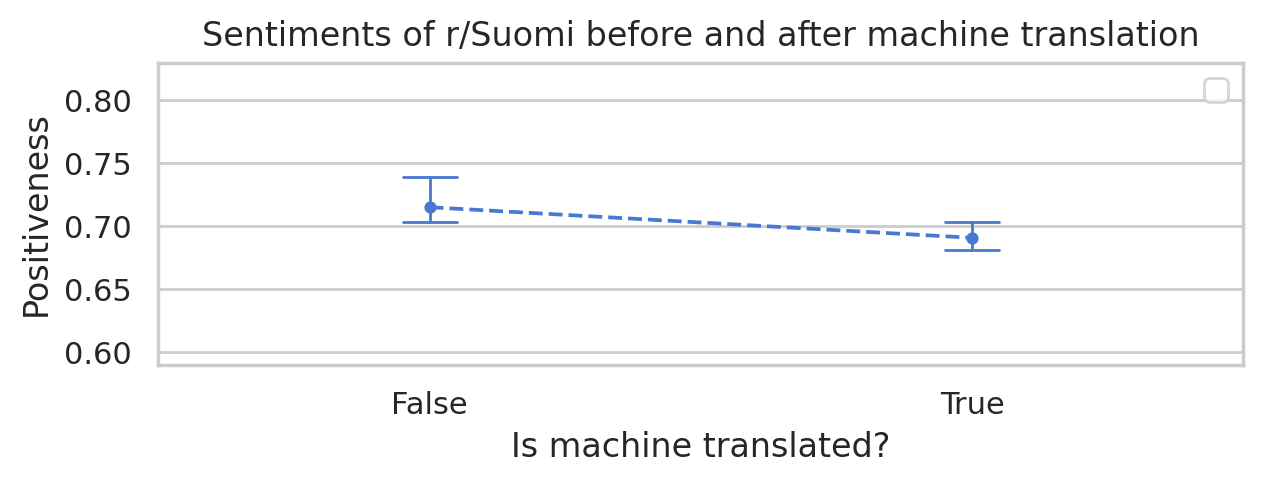

In [13]:
# Plot translation comparisons
sns.set_theme(style="whitegrid")
plt.figure(dpi=200, figsize=(7, 2))

res_models_ax = sns.pointplot(
    data=res_df_trans,
    x="translated", y="portion_positive", hue="native", #style="language",
    join=True, palette='muted',
    capsize=.1, #dodge=True, 
    errwidth=1, markers='o',
    scale=0.5, linestyles='--',
    #order=['Spain', 'South Africa', 'Turkey', 'Thailand',
    #       'Norway', 'Brazil', 'Poland', 'Finland', 'China']
)

plt.xlabel('Is machine translated?')
plt.ylabel('Positiveness')
plt.ylim((0.59,0.83))
plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8])
plt.title('Sentiments of r/Suomi before and after machine translation')
res_models_ax.legend([])
#plt.xticks(rotation=10)
#res_models_ax.set_aspect(1)

#plt.savefig('rsuomi_models.svg')
plt.show()

In [14]:
# Select latest NLTK NB data
res_df_latest = res_df[(res_df.model == 'NLTK NB') & 
                       (res_df['collection_date (M/D/Y)'].isin(['4/27/22', '4/26/22']))]
res_df_latest.head()

,model,subreddit,collection_date (M/D/Y),language,country,translated,portion_positive,native
14,NLTK NB,r/poland,4/26/22,English,Poland,False,0.815,False
15,NLTK NB,r/poland,4/26/22,English,Poland,False,0.795,False
16,NLTK NB,r/poland,4/26/22,English,Poland,False,0.786,False
17,NLTK NB,r/Brazil,4/27/22,English,Brazil,False,0.783,False
18,NLTK NB,r/Brazil,4/27/22,English,Brazil,False,0.813,False


In [15]:
res_df_latest.describe()

,portion_positive
count,60.000000
mean,0.806450
std,0.073299
min,0.670000
25%,0.757750
50%,0.789000
75%,0.858500
max,0.952000


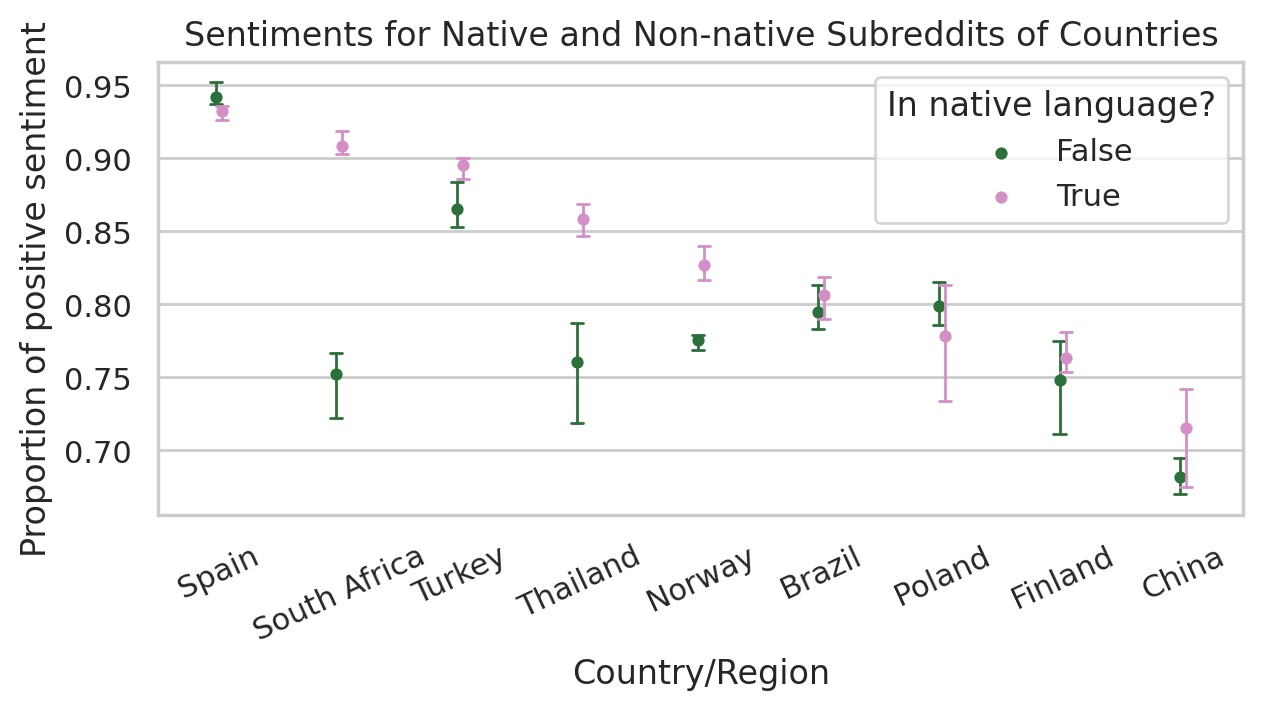

In [16]:
# Plot latest data
sns.set_theme(style="whitegrid")
plt.figure(dpi=200, figsize=(7, 3))

res_latest_ax = sns.pointplot(
    data=res_df_latest,
    x="country", y="portion_positive", hue="native", #style="language",
    join=False, palette='cubehelix',
    capsize=.1, dodge=True, 
    errwidth=1, markers='o',
    scale=0.5,
    order=['Spain', 'South Africa', 'Turkey', 'Thailand',
           'Norway', 'Brazil', 'Poland', 'Finland', 'China']
)

plt.xlabel('Country/Region')
plt.ylabel('Proportion of positive sentiment')
plt.xticks(rotation=25)
plt.title('Sentiments for Native and Non-native Subreddits of Countries')
res_latest_ax.legend(title='In native language?')

#plt.savefig('native_nonnative.svg')
plt.show()

In [17]:
# Then try different models
res_df_models = res_df[(res_df.language == 'Finnish') & 
                       (res_df['collection_date (M/D/Y)'].isin(['4/6/22'])) &
                       (res_df.translated == False)]
res_df_models.head()

,model,subreddit,collection_date (M/D/Y),language,country,translated,portion_positive,native
0,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
1,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
2,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.739,True
8,SKL NB,r/Suomi,4/6/22,Finnish,Finland,False,0.739,True
9,SKL NB,r/Suomi,4/6/22,Finnish,Finland,False,0.754,True


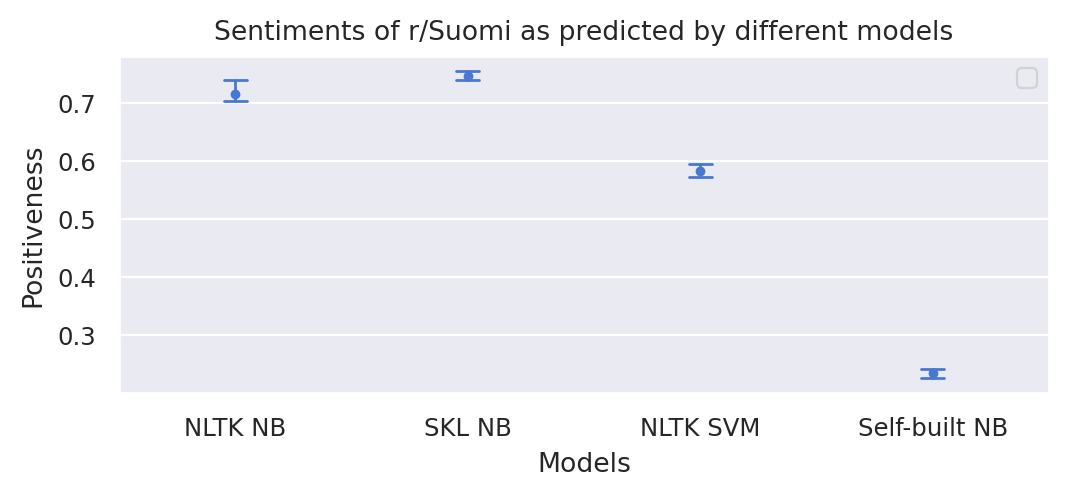

In [18]:
# Plot model comparisons
sns.set_theme(style="darkgrid")
sns.set_context('paper')
plt.figure(dpi=200)

res_models_ax = sns.pointplot(
    data=res_df_models,
    x="model", y="portion_positive", hue="native", #style="language",
    join=False, palette='muted',
    capsize=.1, #dodge=True, 
    errwidth=1, markers='o',
    scale=0.5,
    #order=['Spain', 'South Africa', 'Turkey', 'Thailand',
    #       'Norway', 'Brazil', 'Poland', 'Finland', 'China']
)

plt.xlabel('Models')
plt.ylabel('Positiveness')
plt.title('Sentiments of r/Suomi as predicted by different models')
res_models_ax.legend([])
#plt.xticks(rotation=10)
res_models_ax.set_aspect(2.5)

plt.savefig('rsuomi_models.svg')
plt.show()

In [19]:
# Then try only looking at Finland
res_df_fi = res_df[(res_df.model == 'NLTK NB') & 
                       (res_df.country == 'Finland')]
res_df_fi.head()

,model,subreddit,collection_date (M/D/Y),language,country,translated,portion_positive,native
0,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
1,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.703,True
2,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,False,0.739,True
3,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.681,True
4,NLTK NB,r/Suomi,4/6/22,Finnish,Finland,True,0.688,True


In [20]:
res_df_fi.describe()

,portion_positive
count,14.000000
mean,0.743214
std,0.047997
min,0.681000
25%,0.703000
50%,0.746500
75%,0.771000
max,0.836000


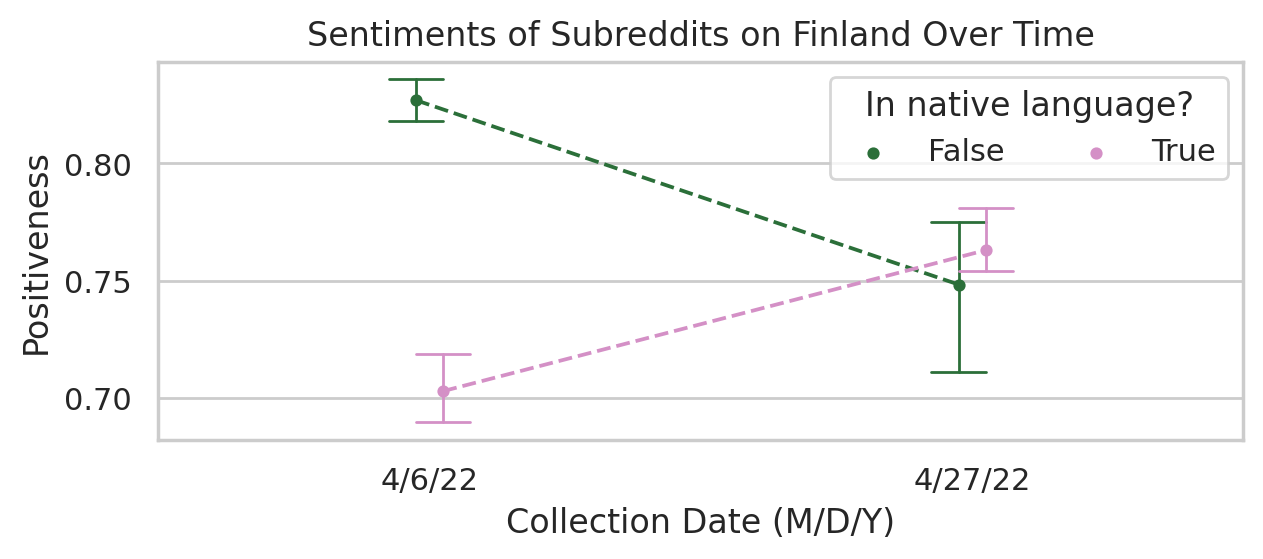

In [22]:
# Try looking at how time influences the result

sns.set_theme(style="whitegrid")
plt.figure(dpi=200, figsize=(7, 2.5))

res_models_ax = sns.pointplot(
    data=res_df_fi,
    x="collection_date (M/D/Y)", y="portion_positive", hue="native",
    join=True, 
    palette='cubehelix',
    capsize=.1, dodge=True, 
    errwidth=1, markers='o',
    scale=0.5, linestyles='--',
    #order=['Spain', 'South Africa', 'Turkey', 'Thailand',
    #       'Norway', 'Brazil', 'Poland', 'Finland', 'China']
)

plt.xlabel('Collection Date (M/D/Y)')
plt.ylabel('Positiveness')
#plt.xticks(rotation=25)
plt.title('Sentiments of Subreddits on Finland Over Time')
res_models_ax.legend(title='In native language?', ncol=2)

plt.savefig('finland_time_series.svg')
plt.show()